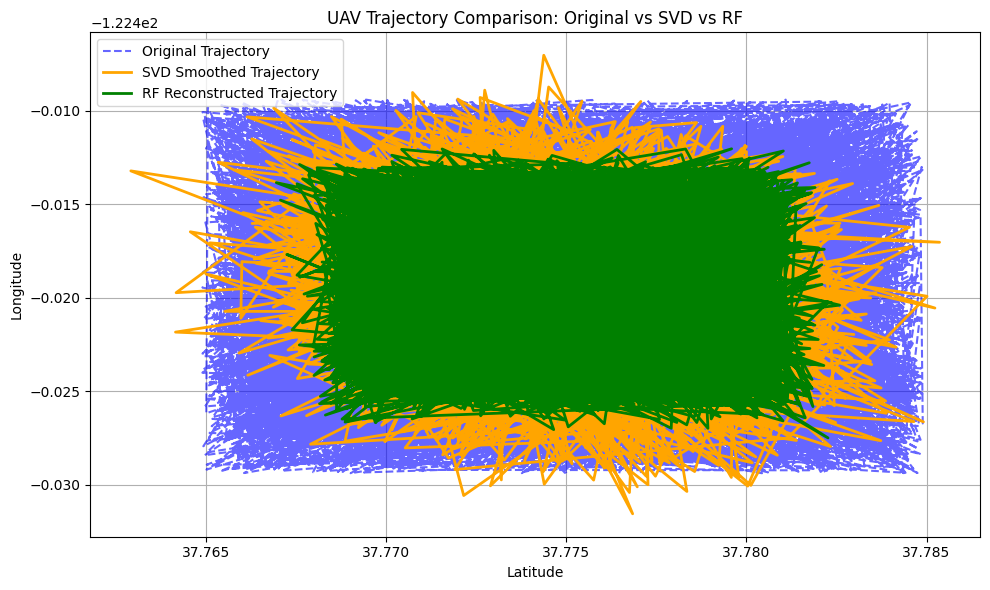

🧠 Performance Comparison:
🔸 Mean Squared Error (SVD): 2016.82734
🔸 Mean Squared Error (RF) : 667.08020
🔸 Trajectory Smoothness (Std Dev of Gradient):
   Original: 0.00246
   SVD     : 0.00167
   RF      : 0.00157


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('uav_navigation_dataset.csv')

# Define sensor features
sensor_columns = ['latitude', 'longitude', 'altitude', 
                  'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 
                  'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z',
                  'lidar_distance', 'speed']

A = df[sensor_columns].values

# -------- SVD Fusion --------
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

svd = TruncatedSVD(n_components=5)  # Keep enough components to preserve structure
A_reduced = svd.fit_transform(A_scaled)
A_reconstructed = svd.inverse_transform(A_reduced)
A_svd_denoised = scaler.inverse_transform(A_reconstructed)

df_svd = pd.DataFrame(A_svd_denoised, columns=sensor_columns)

# -------- Random Forest Fusion --------
df_rf = pd.DataFrame(columns=sensor_columns)
for i, col in enumerate(sensor_columns):
    X = np.delete(A, i, axis=1)
    y = A[:, i]
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    y_pred = rf.predict(X)
    df_rf[col] = y_pred

# -------- Plotting --------
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], 'b--', label='Original Trajectory', alpha=0.6)
plt.plot(df_svd['latitude'], df_svd['longitude'], 'orange', label='SVD Smoothed Trajectory', linewidth=2)
plt.plot(df_rf['latitude'], df_rf['longitude'], 'green', label='RF Reconstructed Trajectory', linewidth=2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("UAV Trajectory Comparison: Original vs SVD vs RF")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# -------- Metrics --------
mse_svd = mean_squared_error(A, A_svd_denoised)
mse_rf = mean_squared_error(A, df_rf[sensor_columns].values)

def gradient_variation(lat, lon):
    grad_lat = np.gradient(lat)
    grad_lon = np.gradient(lon)
    return np.std(np.sqrt(grad_lat**2 + grad_lon**2))

smooth_original = gradient_variation(df['latitude'], df['longitude'])
smooth_svd = gradient_variation(df_svd['latitude'], df_svd['longitude'])
smooth_rf = gradient_variation(df_rf['latitude'], df_rf['longitude'])

print("🧠 Performance Comparison:")
print(f"🔸 Mean Squared Error (SVD): {mse_svd:.5f}")
print(f"🔸 Mean Squared Error (RF) : {mse_rf:.5f}")
print("🔸 Trajectory Smoothness (Std Dev of Gradient):")
print(f"   Original: {smooth_original:.5f}")
print(f"   SVD     : {smooth_svd:.5f}")
print(f"   RF      : {smooth_rf:.5f}")

# -------- Save Results --------
# df_svd.to_csv('svd_denoised_uav_trajectory.csv', index=False)
# df_rf.to_csv('rf_denoised_uav_trajectory.csv', index=False)


In [ ]:
plt.plot(df['latitude'], df['longitude'], 'b--', label='Original Trajectory', alpha=0.6)


In [ ]:
plt.plot(df_svd['latitude'], df_svd['longitude'], 'orange', label='SVD Smoothed Trajectory', linewidth=2)


In [ ]:
plt.plot(df_rf['latitude'], df_rf['longitude'], 'green', label='RF Reconstructed Trajectory', linewidth=2)
